In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

### Exercise 5.1

a) Why does the estimated value function jump up for the last two rows in the rear? 
    Why does it drop off for the whole last row on the left?  

The last two rows are corresponding to states which player's sum is 20 or 21. In these two state player sticks and doesn't go bust. So the player doesn't lose immediately. But in previous states, there is a chance of bust which reduces their state-values. 

b)Why are the frontmost values higher in the upper diagrams than in the lower?  

In the case which usable ace is available, it is possible to prevent going bust, but otherwise, the player loses.

### Exercise 5.2

The results won't be different because every state could be visited just once in an episode.

### Exercise 5.3

$\bullet$ : action  
$\bigcirc$ : state  
$\diamondsuit$ : terminal state  
$\bullet\rightarrow\bigcirc\rightarrow\bullet\rightarrow\bigcirc\rightarrow...\bigcirc\rightarrow\bullet\rightarrow\diamondsuit$

### Exercise 5.4

Initialize:  
$\hspace{1cm}\pi(s) \in A(s)$ (arbitrarily), for all $s \in S$  
$\hspace{1cm}Q(s, a) \in \mathbb{R}$ (arbitrarily), for all $s \in S, a \in A(s)$  
$\hspace{1cm}\underline{N(s, a) \leftarrow 0}$, for all $s \in S, a \in A(s)$  
Loop forever (for each episode):  
$\hspace{1cm}$Choose $S_0 \in S, A_0 \in A(S_0)$ randomly such that all pairs have probability > 0  
$\hspace{1cm}$Generate an episode from $S_0, A_0$, following $\pi: S_0, A_0, R_1, . . . , S_{T-1}, A_{T-1}, R_T$  
$\hspace{1cm}G \leftarrow 0$  
$\hspace{1cm}$Loop for each step of episode, $t = T-1,\ T-2, . . . ,\ 0:$    
$\hspace{1.5cm}G \leftarrow \gamma G + R_{t+1}$  
$\hspace{1.5cm}$Unless the pair $S_t, A_t$ appears in $S_0, A_0, S_1, A_1 . . . , S_{t-1}, A_{t-1}$:  
$\hspace{2.0cm}\underline{N(s, a) \leftarrow N(s, a) +1}$  
$\hspace{2.0cm}\underline{Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \frac{1}{N(s,a)}(Returns(S_t, A_t)-Q(S_t, A_t))}$  
$\hspace{2.0cm}\pi(S_t) \leftarrow  argmax_a Q(S_t, a)$

### Exercise 5.5

$T=10$  
$\rho_{0:T(0)-1} = \prod_{k=0}^{T(0)-1} \frac{\pi(A_k|S_k)}{b(A_k|S_k)}=\prod_{k=0}^{9}  \frac{1}{1}=1$  
$\rho_{t:T(t)-1} = 1$  for $t\in[0,10]$
#### first-visit estimators 
1. ordinary importance sampling  
$V(s) = \frac{1*10}{1}=10$
2. weighted importance sampling  
$V(s) = \frac{1*10}{1}=10$

#### every-visit estimators
1. ordinary importance sampling  
$V(s) = \frac{ \Sigma_{t\in \cal{T}(s)} \rho_{t:T(t)-1}G_T}{|\cal{T}(s)|}=
\frac{ \Sigma_{G_T=10}^{1} 1*G_T}{10}=\frac{55}{10}=5.5$  
2. weighted importance sampling  
$V(s) = \frac{ \Sigma_{t\in \cal{T}(s)} \rho_{t:T(t)-1}G_T}{\Sigma_{t\in \cal{T}(s)} \rho_{t:T(t)-1}}=
\frac{ \Sigma_{G_T=10}^{1} 1*G_T}{\Sigma_{G_T=10}^{1} 1}=\frac{55}{10}=5.5$ 

### Exercise 5.6

$q_{\pi}(s, a) \doteq \mathbb{E}_{\pi}[G_t | S_t =s, A_t = a]$  (3.13)  
$v_{\pi}(s) = \mathbb{E}_b[\rho_{t:T-1} G_t | S_t =s] $  (5.4)  
$\rightarrow  q_{\pi}(s, a) = \mathbb{E}_b[\rho_{q,t:T-1} G_t | S_t =s, A_t = a] $  
$ \rho_{t:T-1} |(A_t=a) = \rho_{t+1:T-1} =  \frac{\prod_{k=t+1}^{T-1}\pi(A_k|S_k)}{\prod_{k=t+1}^{T-1}b(A_k|S_k)}$  (warning: k=t+1 not t)  
$ Q(s) \doteq \frac{\Sigma_{t\in \cal{T}(s)} \rho_{t+1:T(t)-1}G_T}{\Sigma_{t\in \cal{T}(s)} \rho_{t+1:T(t)-1}}$

### Exercise 5.7

🤔?

### Exercise 5.8

The variance of the estimator still is infinite, because all terms of the first-visit MC method are present in the  
expected square of the importance-sampling(with some addtional terms which make it much bigger).

### Exercise 5.9

Input: a policy $\pi$ to be evaluated  
Initialize:  
$\hspace{1cm}V(s) \in \mathbb{R}$, arbitrarily, for all $s \in S$  
$\hspace{1cm}$N(s) $\leftarrow$0, for all $s \in S$  
Loop forever (for each episode):  
$\hspace{1cm}$Generate an episode following $\pi: S_0, A_0, R_1, S_1, A_1, R_2, . . . , S_{T-1}, A_{T-1}, R_T$  
$\hspace{1cm}$G $\leftarrow$0  
$\hspace{1cm}$Loop for each step of episode,$ t = T-1, T-2, . . . , 0$:  
$\hspace{1.5cm}G \leftarrow \gamma G + R_{t+1}$  
$\hspace{1.5cm}$Unless $S_t$ appears in S_0, S_1, . . . , S_{t-1}:  
$\hspace{2.0cm}$N(s) $\leftarrow$ N(s) + 1  
$\hspace{2.0cm}V(S_t)\leftarrow V(S_t)+\frac{1}{N(s)}[G-V(S_t)]$

### Exercise 5.10

$V_n \doteq \frac{\Sigma_{k=1}^{n-1}W_kG_k}{\Sigma_{k=1}^{n-1}W_k} = \frac{\Sigma_{k=1}^{n-1}W_kG_k}{C_{n-1}}$  

$V_{n+1} = \frac{V_n*C_{n-1} + W_n*G_n}{C_{n-1} + W_n}$  
$= \frac{V_n*(C_{n-1}+W_n) - V_n*W_n + W_n*G_n}{C_n}$  
$= V_n + \frac{W_n}{C_{n}}(G_n-V_n)$ 

### Exercise 5.11

$ \pi$ is deterministic, so $\pi(A_t|S_t)$ is one.

### Exercise 5.12

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
from PIL import Image
from CH5 import racetrack as rt
im = np.array(Image.open("C:/Users/mamin/GitHub/RLBookSolutions/CH5/E 5.12 - 2.bmp"))

Map shape

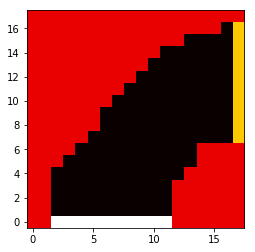

In [3]:
gridmap = np.flip((im==12)*rt.OBSTACLE+(im==15)*0+(im==11)*rt.GOAL+(im==9)*rt.START, 0)
agent = rt.Agent(grid_map=gridmap)
plt.figure()
plt.imshow(agent.grid_map, cmap='hot')
plt.gca().invert_yaxis()

A random path from start to end

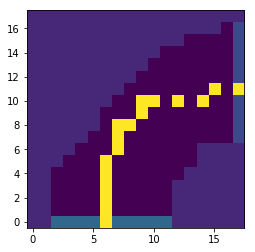

In [4]:
episode=agent.episode_generator()
mp = gridmap.copy()

for e in episode[-28:]:
    mp[e[:2]] = 9
plt.imshow(mp)
plt.gca().invert_yaxis()

learning by off-policy MC control over 1000000 iteration

In [102]:
pi = agent.off_policy_MC_control(1000000)

0.999999


Policy map (each graph is related to a (Vx, Vy) pair)  
As it is seen, there is a long way to obtain optimal policy(even after 1000000 iterations).

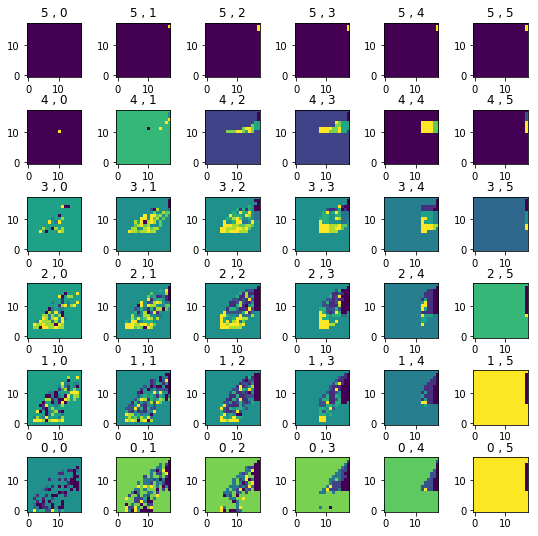

In [103]:
plt.figure(figsize=(agent.vx_range*1.5, agent.vx_range*1.5))
for i in reversed(range(agent.vx_min, agent.vx_max+1)):
    for j in range(agent.vy_min, agent.vy_max+1):
        plt.subplot(agent.vx_range, agent.vx_range, (-i + agent.vx_max) * (agent.vx_range) +(j - agent.vy_min)+1)
        plt.imshow(pi[:,:,i,j] )
        plt.title(str(i) + " , " + str(j))
        plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.6, hspace=0.6)


In [ ]:
# first state (random)
s = agent.random_start() + (0, 0)
# a log list for episode
episode = list()

while True:
    a = np.int16(pi[s])
    s, r = agent.environment(s, a)
    episode.append(s + ( a, r, 1.0/9))
    if agent.grid_map[s[:2]] == rt.GOAL:
        break

A trajectory following trained policy

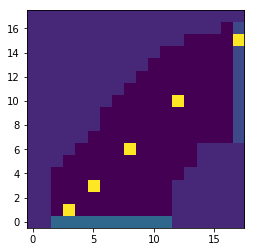

In [113]:
mp = gridmap.copy()
for e in episode:
    mp[e[:2]] = 9
plt.imshow(mp)
plt.gca().invert_yaxis()

In [114]:
episode

[(1, 3, 1, 1, 8, -1, 0.1111111111111111),
 (3, 5, 2, 2, 8, -1, 0.1111111111111111),
 (6, 8, 3, 3, 8, -1, 0.1111111111111111),
 (10, 12, 4, 4, 8, -1, 0.1111111111111111),
 (15, 17, 5, 5, 8, 10, 0.1111111111111111)]